In [1]:
import os 
import scanpy as sc

In [2]:
thor_dir = "/Users/pengzhizhang/HF_Lai_normalize/Heart_II"

In [3]:
ad_s1_path = os.path.join(thor_dir, "fineST_s1/s1_thor_adata_20.h5ad")
ad_thor_s1 = sc.read_h5ad(ad_s1_path)

ad_s3_path = os.path.join(thor_dir, "fineST_s3/s3_thor_adata_20.h5ad")
ad_thor_s3 = sc.read_h5ad(ad_s3_path)

ads = {'s1': ad_thor_s1, 's3': ad_thor_s3}

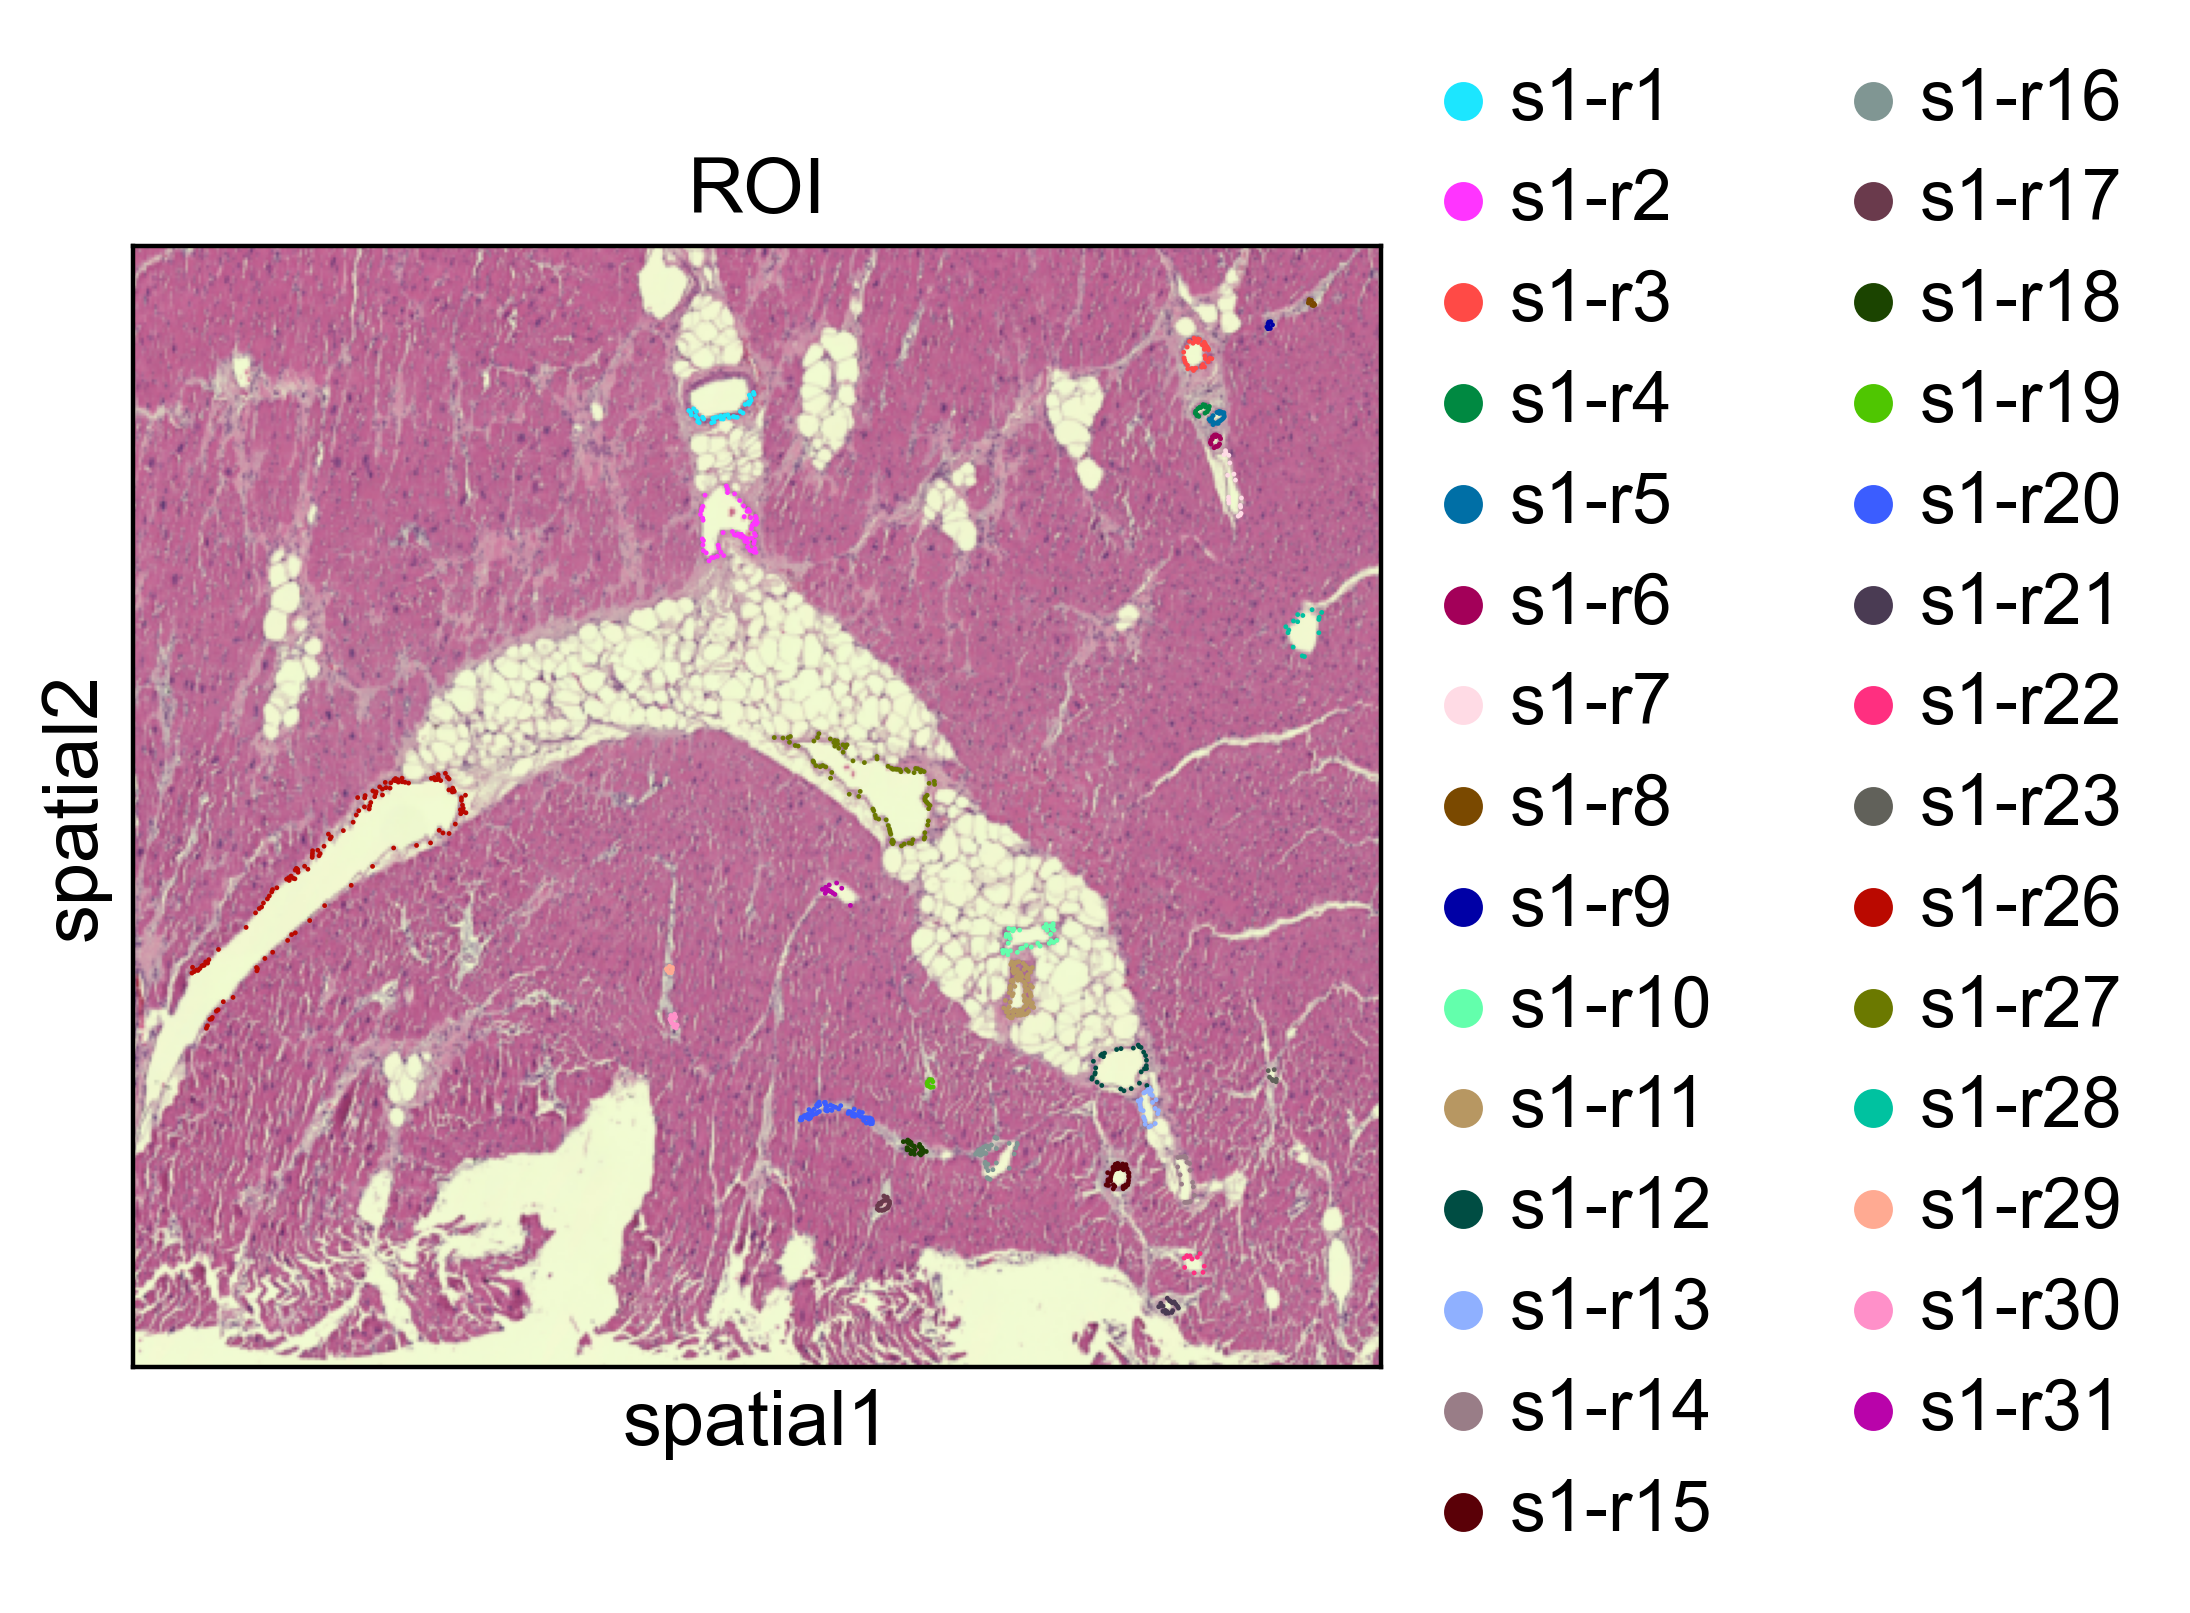

In [31]:
sc.set_figure_params(dpi=200)
sc.pl.spatial(ad_thor_s1_vis, color='ROI', spot_size=30)

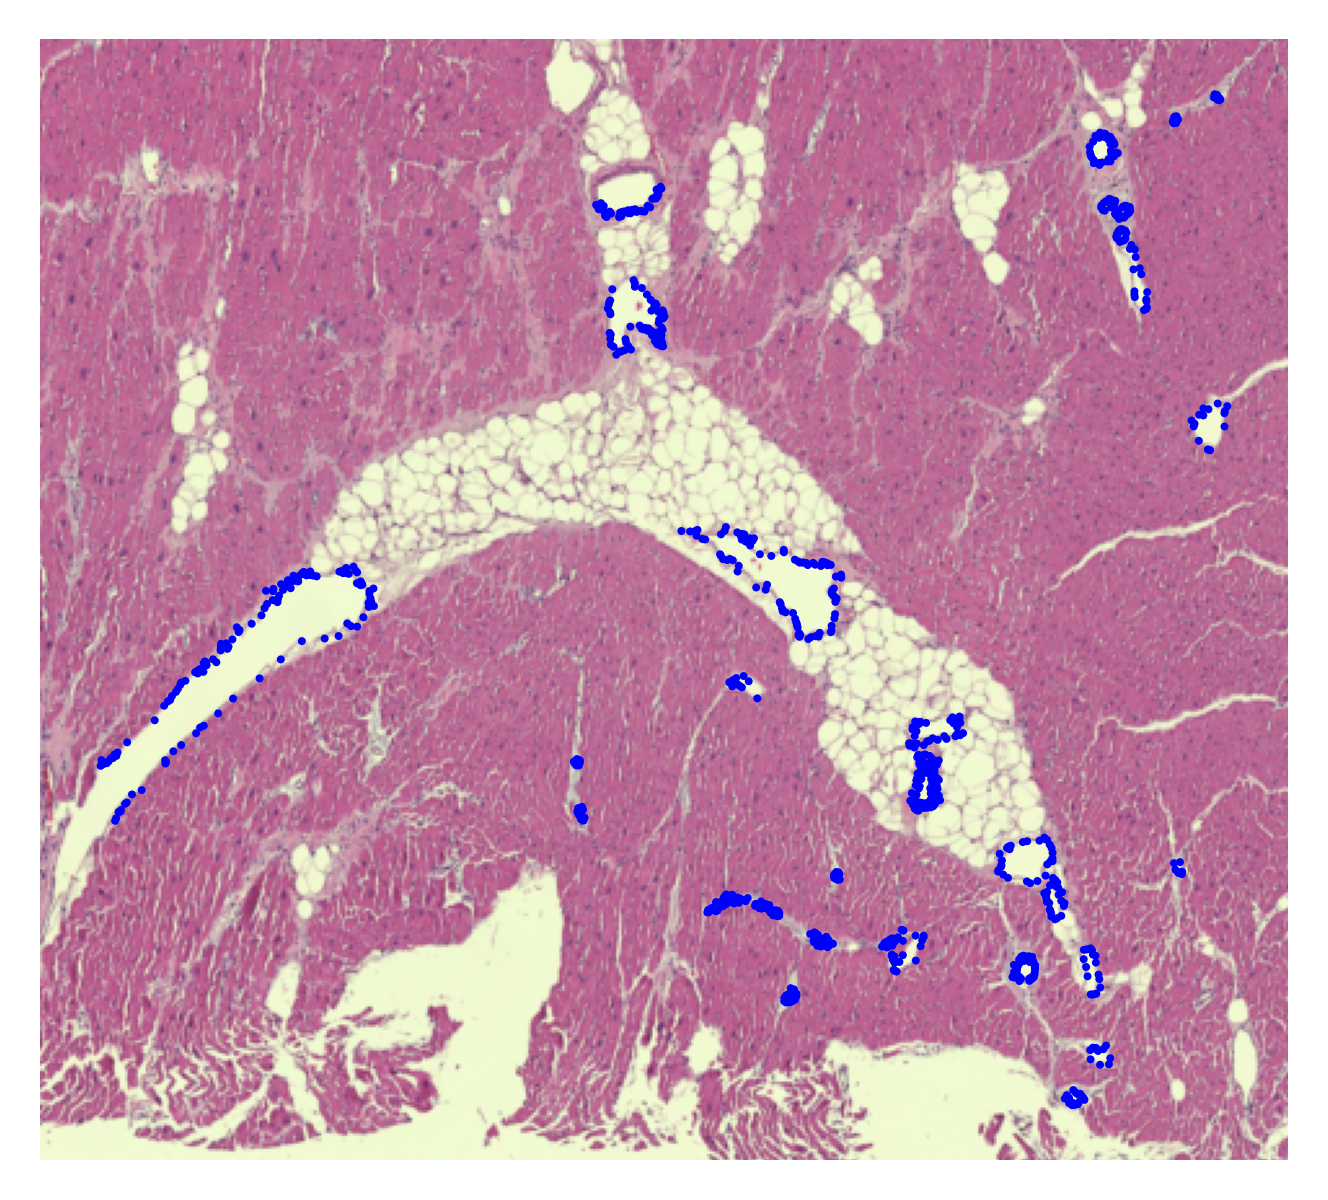

In [101]:
ad_thor_s1_vis = ad_thor_s1[ad_thor_s1.obs['ROI'] != 'Unselected'].copy()
sc.pl.spatial(ad_thor_s1_vis, color='in_tissue', spot_size=50, legend_loc=None, palette='b', save='thor_s1_vessel_tissue.png', frameon=False, title="")

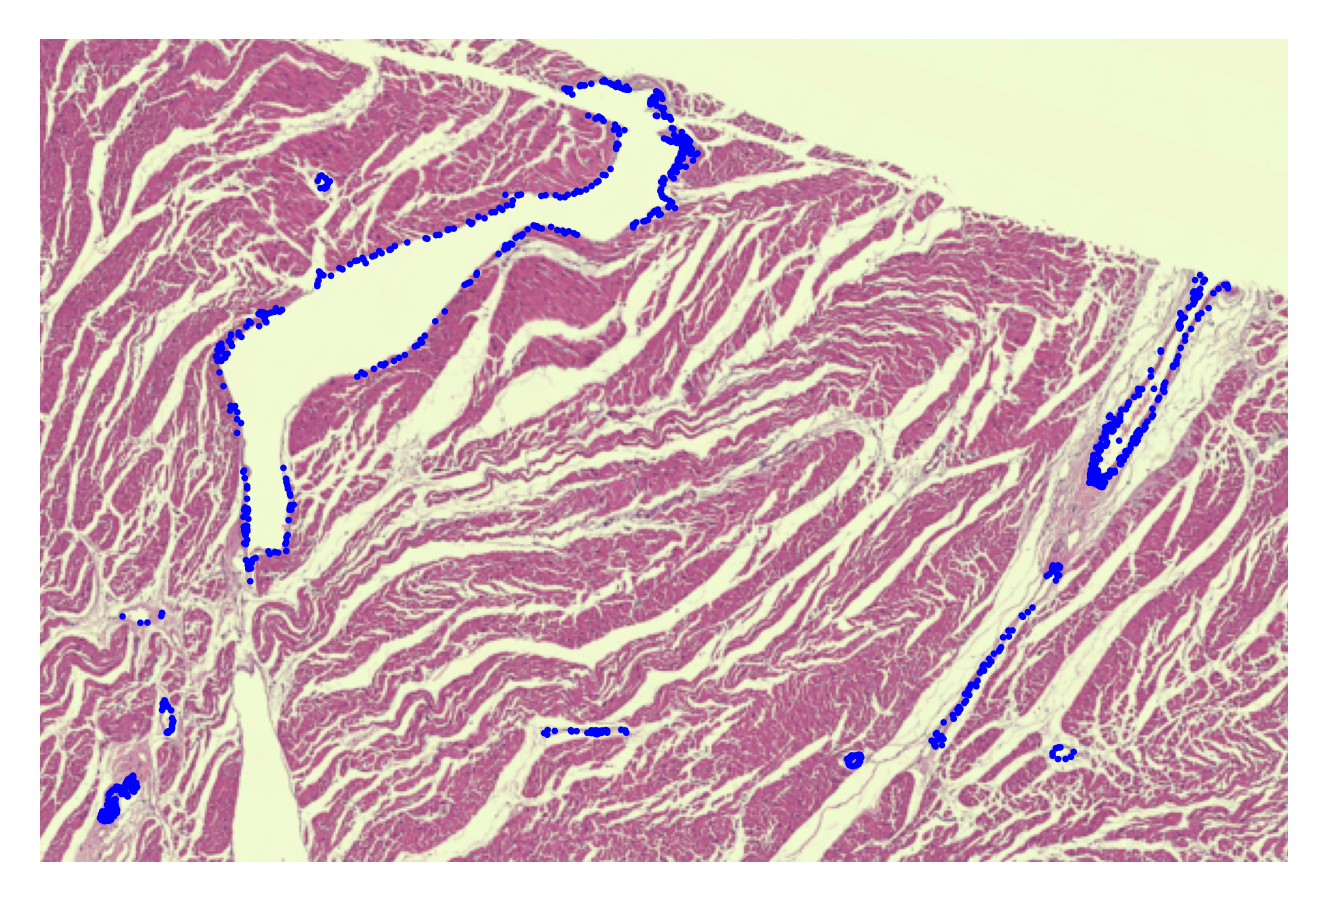

In [100]:
ad_thor_s3_vis = ad_thor_s3[ad_thor_s3.obs['ROI'] != 'Unselected'].copy()
sc.pl.spatial(ad_thor_s3_vis, color='in_tissue', spot_size=50, legend_loc=None, palette='b', save='thor_s3_vessel_tissue.png', frameon=False, title="")

In [57]:
adv1 = ad_thor_s1[~ad_thor_s1.obs.ROI.isin(['Unselected'])]
adv3 = ad_thor_s3[~ad_thor_s3.obs.ROI.isin(['Unselected'])]
adv = {'s1': adv1, 's3': adv3}
adv = sc.AnnData.concatenate(*adv.values(), batch_key='sample', batch_categories=['s1', 's3'])

/Users/pengzhizhang/anaconda3/envs/thor/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [61]:
adv.X[adv.X < 0] = 0

In [65]:
adv.write_h5ad(os.path.join(thor_dir, "ad_combined_vessels.h5ad"))

### Differentially expressed genes

In [7]:
from matplotlib import pyplot as plt

ad_thor_s1.obs['vessel'] = ad_thor_s1.obs['ROI'].apply(lambda x: 'vessels' if x != 'Unselected' else 'rest')
sc.tl.rank_genes_groups(ad_thor_s1, groupby='vessel', groups=['vessels'], reference='rest')
# sc.set_figure_params(dpi=150, figsize=(20,10))
# plt.rcParams["axes.grid"] = False

# sc.pl.rank_genes_groups(ad_thor_s1, groups=['vessels'], n_genes=50, ncols=1, fontsize=12, show=False)

In [13]:
df_s1 = sc.get.rank_genes_groups_df(
    ad_thor_s1, 'vessels', pval_cutoff=0.05, log2fc_min=2
)

df_s1

names     scores  logfoldchanges          pvals      pvals_adj
0        FOS  52.668034        2.109415  2.482293e-295  2.067986e-293
1      CSRP1  49.961906        2.066983  2.743450e-274  1.745333e-272
2      TAGLN  47.919743        2.824694  5.655388e-261  3.067938e-259
3      ADIRF  47.497559        2.303736  2.382163e-259  1.253412e-257
4      ACTA2  44.337776        2.687633  1.454849e-237  5.919207e-236
..       ...        ...             ...            ...            ...
325     HBA2   6.213837        2.444723   7.671364e-10   1.214025e-09
326   NBPF19   6.211482        2.141423   7.768051e-10   1.228771e-09
327      LHB   6.088478        2.338549   1.640759e-09   2.571563e-09
328      DCD   5.827083        2.157739   7.660175e-09   1.173509e-08
329  CLLU1OS   3.834708        2.108645   1.338109e-04   1.729253e-04

[330 rows x 5 columns]

In [171]:
with open("Post-DEG-s1_genes.txt", "w") as f:
    for g in df_s1.names:
        f.write(g+"\n")

In [14]:
ad_thor_s3.obs['vessel'] = ad_thor_s3.obs['ROI'].apply(lambda x: 'vessels' if x != 'Unselected' else 'rest')
sc.tl.rank_genes_groups(ad_thor_s3, groupby='vessel', groups=['vessels'], reference='rest')

df_s3 = sc.get.rank_genes_groups_df(
    ad_thor_s3, 'vessels', pval_cutoff=0.05, log2fc_min=2
    )
df_s3

names     scores  logfoldchanges          pvals      pvals_adj
0       VIM  46.983665        2.176891  2.094893e-241  2.255394e-239
1     TAGLN  40.533535        3.405335  3.052961e-202  2.094571e-200
2      CCN2  39.958858        2.640185  6.208515e-199  4.137828e-197
3      CCN1  39.192749        2.345033  2.931582e-194  1.865019e-192
4    COL3A1  38.760052        2.244384  8.892323e-192  5.411172e-190
..      ...        ...             ...            ...            ...
512  RASA4B   5.727336        2.327418   1.409894e-08   2.095675e-08
513    CHGA   5.650852        2.000702   2.170150e-08   3.189815e-08
514    MAS1   5.495721        2.892391   5.129023e-08   7.442028e-08
515  IZUMO2   5.218079        2.336282   2.267150e-07   3.220117e-07
516    VIL1   5.159015        2.191676   3.082824e-07   4.352149e-07

[517 rows x 5 columns]

In [173]:
with open("Post-DEG-s3_genes.txt", "w") as f:
    for g in df_s3.names:
        f.write(g+"\n")

In [175]:
common_genes = set(df_s3['names']) & set(df_s1['names'])

with open('Post-DEG-vessel_common_genes_new.txt', 'w') as f:
    for g in common_genes:
        f.write(g+'\n')

### Rank the genes

In [10]:
common_genes = set(df_s3['names']) & set(df_s1['names'])
print(len(common_genes))

56


In [15]:
# combine df_s1 and df_s3 and calculate the averages for the score, logfoldchange and pvals

df_s1 = df_s1[df_s1['names'].isin(common_genes)].copy()
df_s3 = df_s3[df_s3['names'].isin(common_genes)].copy()

df_s1['s1_score'] = df_s1['scores']
df_s1['s1_logfoldchange'] = df_s1['logfoldchanges']
df_s1['s1_pvals'] = df_s1['pvals']

df_s3['s3_score'] = df_s3['scores']
df_s3['s3_logfoldchange'] = df_s3['logfoldchanges']
df_s3['s3_pvals'] = df_s3['pvals']

df_s1 = df_s1[['names', 's1_score', 's1_logfoldchange', 's1_pvals']]
df_s3 = df_s3[['names', 's3_score', 's3_logfoldchange', 's3_pvals']]
df = df_s1.merge(df_s3, on='names', how='outer')

df['avg_score'] = (df['s1_score'] + df['s3_score']) / 2
df['avg_logfoldchange'] = (df['s1_logfoldchange'] + df['s3_logfoldchange']) / 2
df['avg_pvals'] = (df['s1_pvals'] + df['s3_pvals']) / 2

df = df.sort_values(by='avg_score', ascending=False)
df

names   s1_score  s1_logfoldchange       s1_pvals   s3_score  \
2      TAGLN  47.919743          2.824694  5.655388e-261  40.533535   
0        FOS  52.668034          2.109415  2.482293e-295  31.987068   
1      CSRP1  49.961906          2.066983  2.743450e-274  31.746109   
3      ACTA2  44.337776          2.687633  1.454849e-237  34.428070   
4      MYH11  44.115574          3.266013  9.303614e-236  22.598164   
5   C11orf96  42.367535          2.587060  1.764581e-224  16.800865   
6      LMOD1  37.325386          2.531714  4.949932e-191  19.251389   
9       MYLK  30.344551          2.135525  1.979680e-143  24.439911   
14       ID4  25.978243          3.051323  2.155046e-113  28.076654   
7     MUSTN1  35.234665          2.047957  2.062440e-177  16.450096   
8    PLA2G2A  31.821091          2.567013  1.516444e-153  18.144497   
15     CCDC3  24.943480          2.298852  8.766494e-107  21.234570   
10      FOSB  28.668354          2.066333  3.961092e-132  17.270008   
11     FOXC1  28.329134          2.439654  1.665508e-129  17.509283   
17  C12orf75  23.372797          2.831100   2.764574e-96  20.494059   
12     ITGA8  27.112057          3.095749  5.019959e-121  15.882430   
16     ITGB4  23.767305          2.777074   7.816843e-99  19.015646   
19    CRABP2  19.182379          2.194331   5.749394e-70  19.030718   
13     PLIN1  26.681948          2.925974  2.312902e-118  10.517978   
23      VASN  16.516521          2.000120   3.024519e-54  18.939377   
21  SERPINI2  17.819323          2.774332   1.115657e-61  15.888556   
20     NTRK3  19.086802          2.237425   2.308137e-69  13.021647   
18     ACTG2  19.559353          2.505811   3.269797e-72  12.304292   
28     GLYAT  13.031940          2.150793   6.332666e-36  17.019701   
22     RIMS3  16.634336          3.599495   7.785674e-55  13.104879   
24     KCNT2  14.087814          2.162843   3.539266e-41  15.378778   
31     TSSK4  11.707811          2.061115   1.027297e-29  16.656603   
26    ADORA3  13.452583          2.078052   5.734927e-38  13.994909   
25      LGR6  13.683875          3.351848   4.188340e-39  13.071505   
29      PCK1  12.076763          2.502647   2.068213e-31  14.590583   
38    OR51A4   9.836104          2.129980   7.793252e-22  15.811341   
36    CELA2B  10.012762          2.177555   1.563304e-22  15.202057   
30   SLC35A2  11.789080          2.104665   4.428363e-30  13.142741   
27  SERPINA3  13.167938          2.852104   1.509550e-36  10.878227   
44  ARHGAP40   9.243881          2.464086   1.466721e-19  14.297830   
41    TSGA13   9.566618          2.794782   8.789859e-21  13.449328   
40     ITIH3   9.704181          2.130810   2.533931e-21  13.148546   
32      SCTR  11.681133          2.918556   1.358827e-29  11.132533   
42   CCDC172   9.539619          2.752150   1.116158e-20  12.589810   
33      CNR2  11.541879          2.321029   5.652613e-29   9.963631   
50     RAB36   8.464145          2.405424   9.342018e-17  12.752178   
48     KRT71   8.771829          3.183204   7.821143e-18  12.221632   
51   SLC17A4   8.223861          2.088385   6.264620e-16  12.561392   
37     STRA8   9.961342          2.432818   2.535446e-22  10.602591   
49     OR2T6   8.606944          2.338269   2.977509e-17  11.488579   
45     OR6C2   9.234558          2.363070   1.590251e-19  10.756479   
52      DKK2   8.145379          2.653597   1.158017e-15  11.679749   
46      TGM6   9.043979          2.353315   8.027530e-19  10.021929   
34     PDZD7  10.981300          2.562584   1.564728e-26   8.009763   
35   SEPTIN3  10.968554          2.818264   1.795254e-26   6.781502   
54  C12orf56   6.964407          2.291338   6.060512e-12  10.723826   
39    ADGRG2   9.776734          3.306999   1.349383e-21   7.731223   
43   LGALS16   9.274010          2.681660   1.125568e-19   8.127034   
47    MRGPRE   9.039754          2.066757   8.303750e-19   8.333585   
55    KISS1R   6.684971          2.439205   3.887051e-11   9.546601   
53      CHGA   7.994565        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


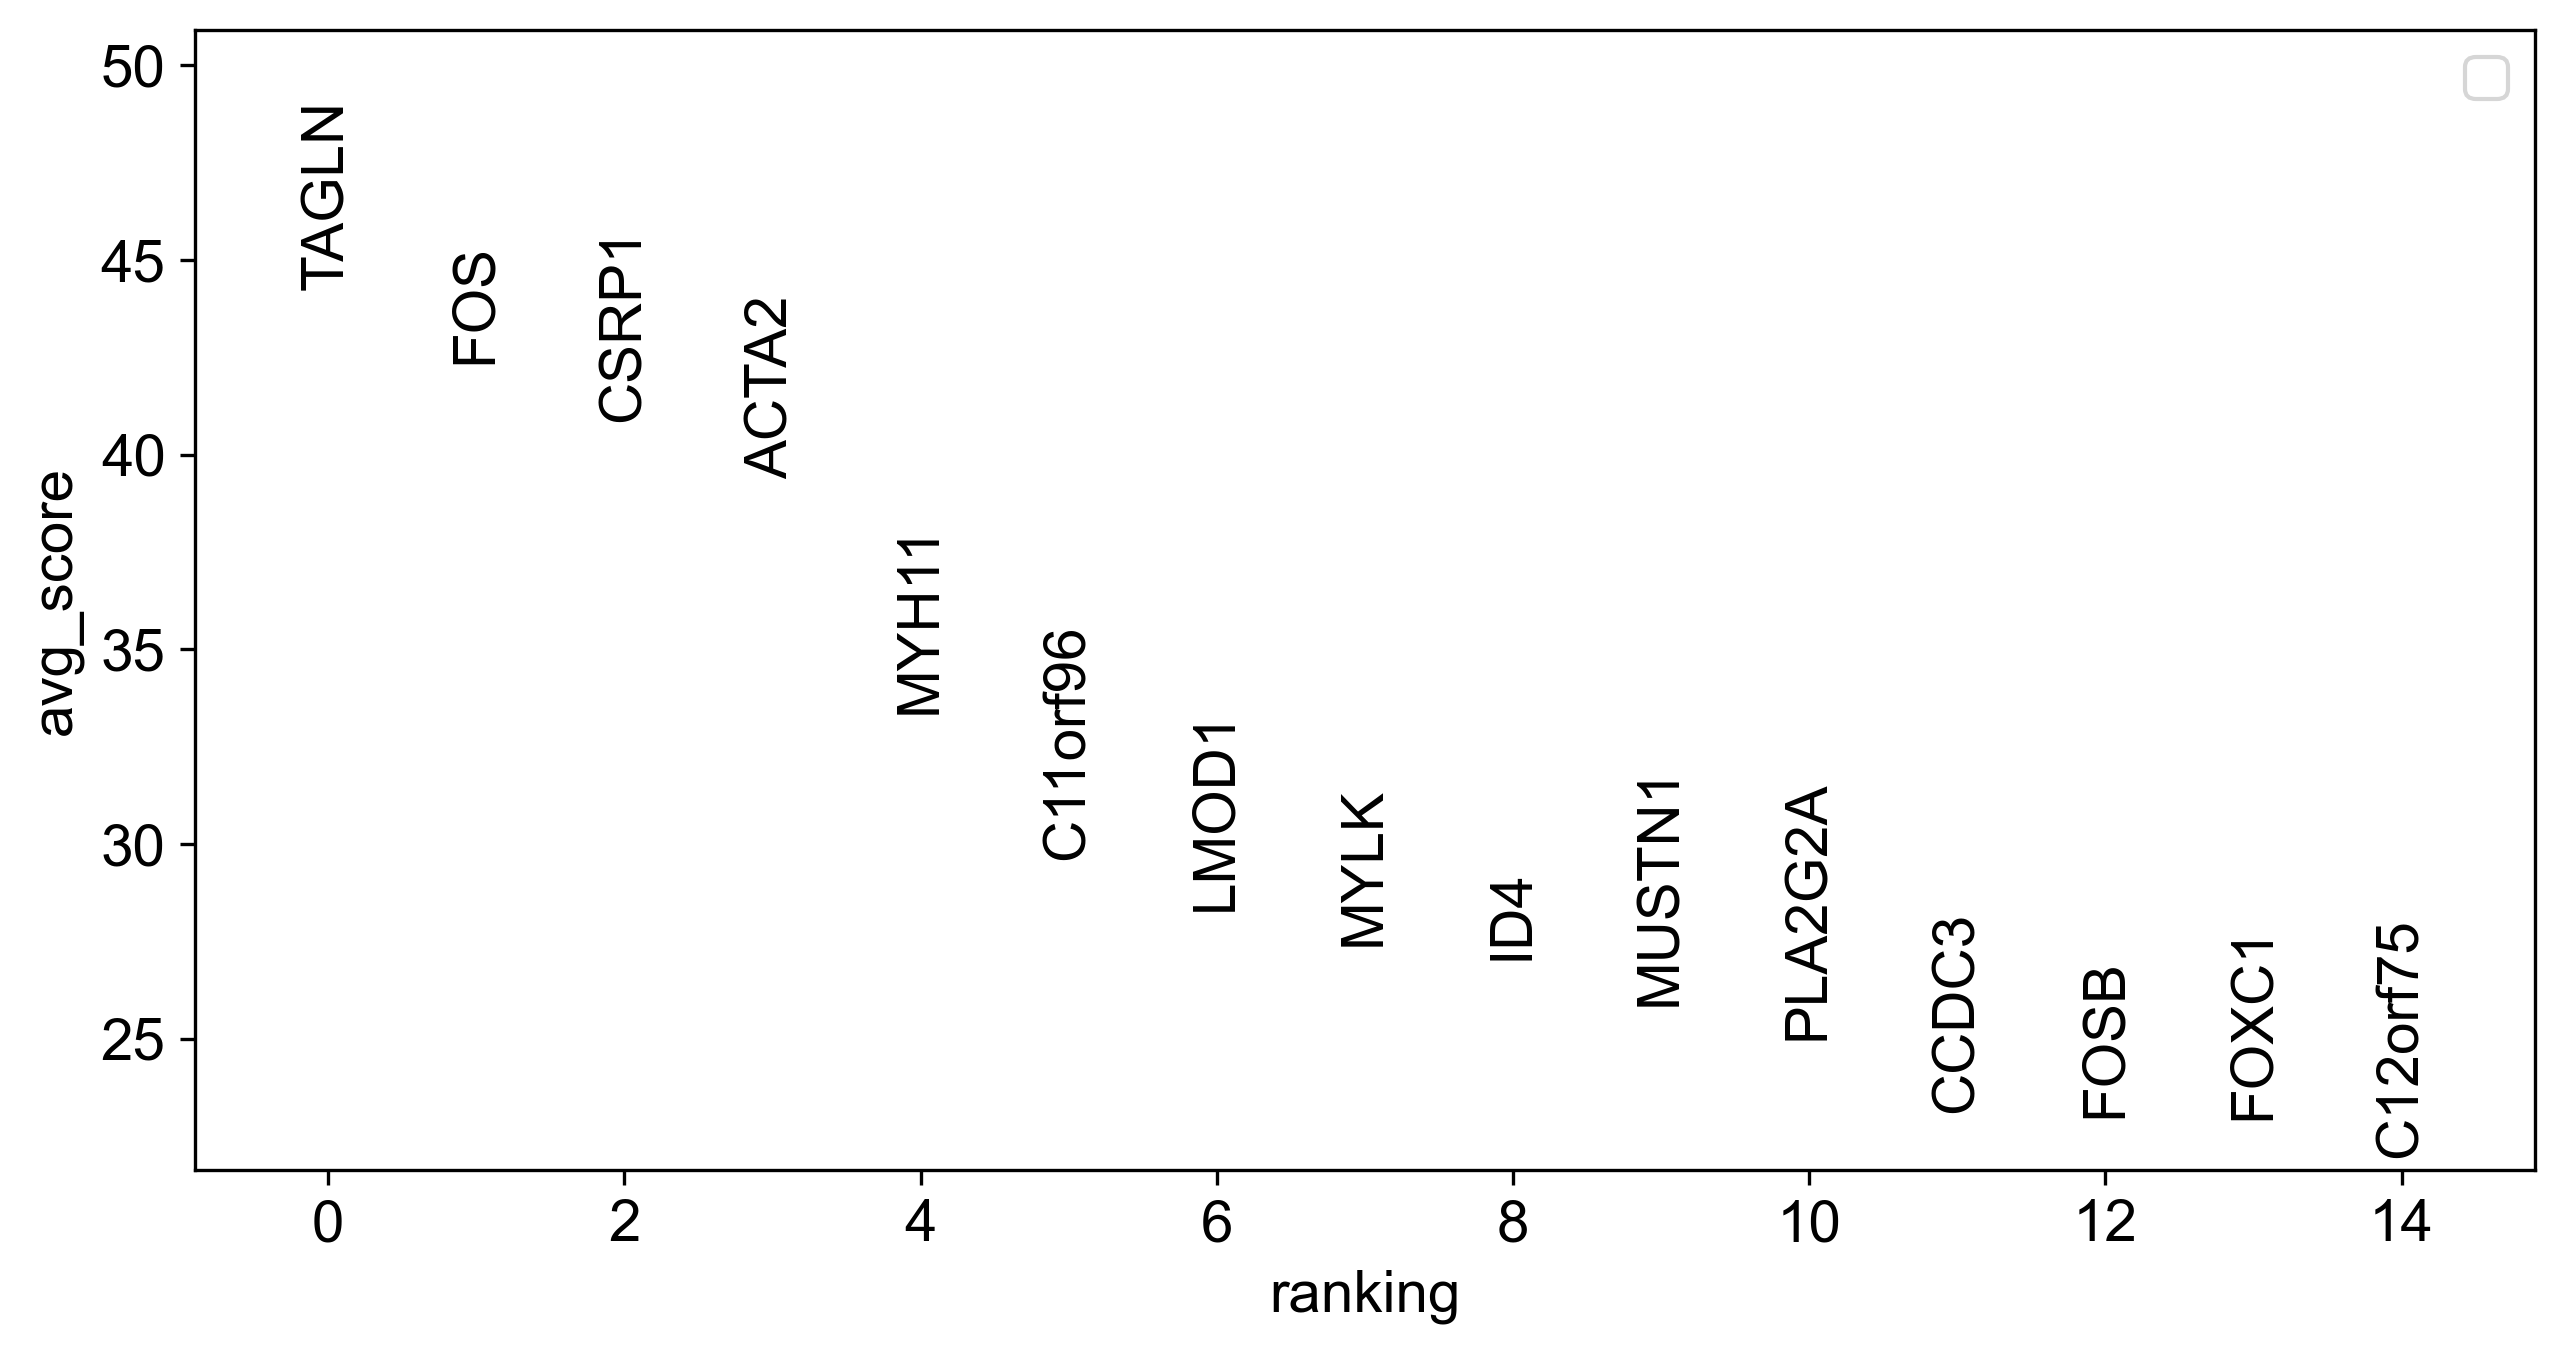

In [80]:
# plot the results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
n_genes = 15

gene_names = df['names'].tolist()[:n_genes]
scores = df['avg_score'].tolist()[:n_genes]

ymin = np.min(scores)
ymax = np.max(scores)
ymax += 0.3 * (ymax - ymin)
ax = fig.add_subplot()
ax.set_ylim(ymin-0.3, ymax)
ax.set_xlim(-0.9, n_genes - 0.1)

# Making labels
for ig, gene_name in enumerate(gene_names):
    ax.text(
        ig,
        scores[ig],
        gene_name,
        rotation="vertical",
        verticalalignment="bottom",
        horizontalalignment="center",
        fontsize=14,
    )


plt.xlabel('ranking')
plt.ylabel('avg_score')
plt.legend()

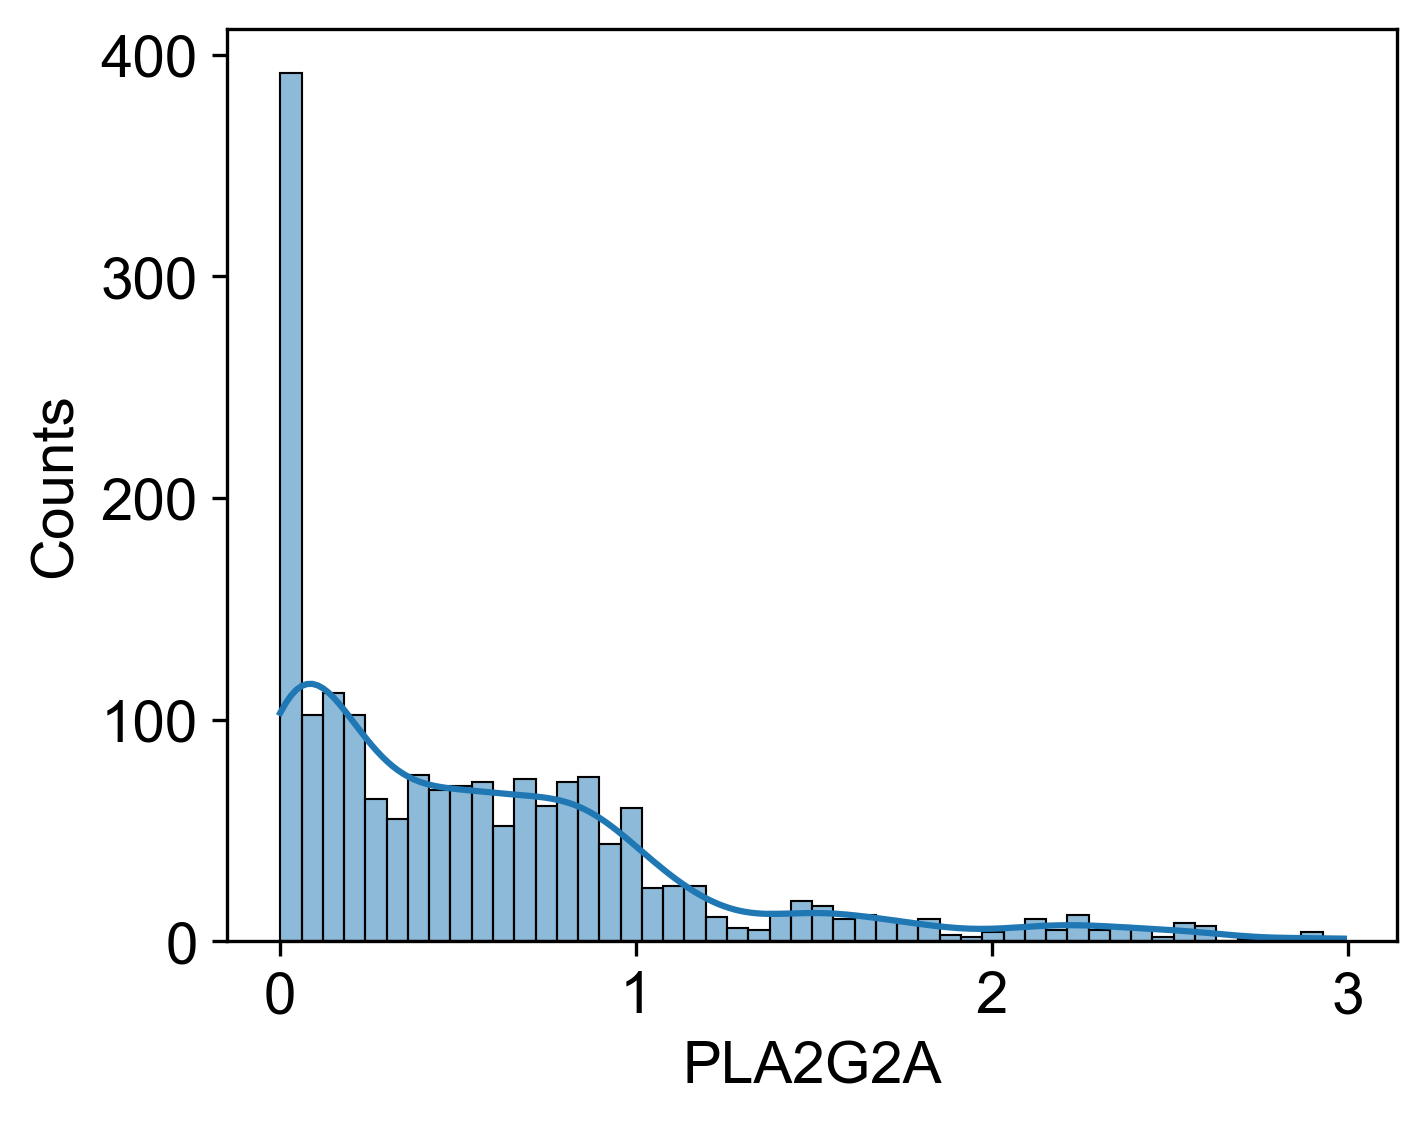

In [98]:
import seaborn as sns

plt.figure(figsize=(5, 4))
tag1 = ad_thor_s1_vis[:, 'PLA2G2A'].X.toarray().flatten()
tag3 = ad_thor_s3_vis[:, 'PLA2G2A'].X.toarray().flatten()
tag = np.concatenate([tag1, tag3])
sns.histplot(tag, kde=True, bins=50)
plt.xlabel('PLA2G2A')
plt.ylabel('Counts')
plt.show()